
# Handwritten Digits Classification using MNIST

## Introduction
This project aims to classify handwritten digits from the MNIST dataset using machine learning techniques. 
The dataset consists of 70,000 grayscale images of digits (0-9), each represented as a 28x28 pixel image. 
The goal is to train a model that accurately recognizes and classifies these digits.


In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [2]:
X, y = mnist['data'], mnist['target']
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

Datasets loaded by Scikit-Learn generally have a similar dictionary structure includ‐
ing:
• A DESCR key describing the dataset
• A data key containing an array with one row per instance and one column per
feature
• A target key containing an array with the labels

In [3]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


There are 70,000 images, and each image has 784 features. Each image
is 28×28 pixels, and each feature represents one pixel’s intensity, from 0
(white) to 255 (black).

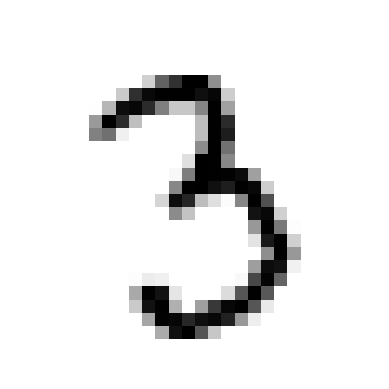

'3'

In [4]:
#Peeking at one digit. Take an instance's feature matrix and reshape it to 28x28
import matplotlib
import matplotlib.pyplot as plt

some_digit = X.iloc[30000].values
some_digit_image = some_digit.reshape(28, 28)
#Display using imshow()
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()
y.iloc[30000] #Label

The MNIST dataset is actually already split into a training set (the first 60,000
images) and a test set (the last 10,000 images)

In [5]:
X_train, X_test, y_train, y_test = X.iloc[:60000].values, X.iloc[60000:].values, y.iloc[:60000].values, y.iloc[60000:].values

In [6]:
#Shuffle the training set to gurantee all cross-validation folds to be similar
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

Binary Classifier

Training a binary classifier to identify one digit
Taking 3, thus the binary classifier would only be able to distinguish between two classes, classes 3 and not 3

In [7]:
#Target vectors
y_train_3 = (y_train == '3')
y_test_3 = (y_test == '3')

In [8]:
#Using Stochastic Gradient Descent(SGD) classifier, it efficiently handles big datasets
#It deals with training instances indivually
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_3)
#SGDClassifier relies on randomness


SGDClassifier(random_state=42)

In [9]:
sgd_clf.predict([some_digit])

array([ True])

Evaluating the model performace

In [10]:
#Measuring accuracy using cross-validation using K-fold cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_3, cv = 3, scoring = "accuracy")

array([0.96395, 0.9611 , 0.9551 ])

accuracy is above 95, lets check the accuracy of class not 3


In [11]:
from sklearn.base import BaseEstimator

class never3Classifier(BaseEstimator):
  def fit(self, X, y = None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype = bool)

never_3_clf = never3Classifier()
cross_val_score(never_3_clf, X_train, y_train_3, cv = 3, scoring = "accuracy")

array([0.89625, 0.90015, 0.89705])

About 11 percent images are 3s. Guessing that an image is not 3, the guess will be 89% right.
This shows that accuracy is generally not the preferred performance measure for classifiers, especially when dealing with skewed datasets(some classes have more frequency)

In [12]:
#Confusion matrix
#To compute the confusion matrix, we need a set of predictions, we can use cross_val_predict()
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv = 3)

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_3, y_train_pred)

array([[53248,   621],
       [ 1776,  4355]])

Confusion Matrix is much better way to evaluate the performance of a classifier. Here 53,175 of them were correctly classified as non-3s (they are called true
negatives), while the remaining 694 were wrongly classified as 3s (false positives).
The second row considers the images of 3s (the positive class): 1406 were wrongly
classified as non-3s (false negatives), while the remaining 4725 were correctly classified as 3s (true positives).  

In [14]:
#A more concise metric is Precision = TP / TP + FP
#Precision is used with another metric recall, true positive rate: TP / TP + FN
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_3, y_train_pred)

0.8752009646302251

In [15]:
recall_score(y_train_3, y_train_pred)

0.7103245800032622

The 3s Classifier is only right 54 % of the time, when it claims a image is 3, while it detects 90 % of 3s. It has a good recall score but bad precision

In [16]:
#We can combine both metrics into a single F1, which is the harmonic mean
from sklearn.metrics import f1_score
f1_score(y_train_3, y_train_pred)

0.7841901503556316

Precision is inversely proportional to recall, this is called precision/recall tradeoff

In [17]:
#we can vary with the values of precision and recall, by fluctuating the threshold
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([6658.99269211])

In [18]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred
#SGDClassifier uses threshold equal to 0 thus the output is same as predict()

array([ True])

In [19]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred
#raising the threshold, decreases the recall

array([False])

In [20]:
#to decide which threshold to use we need to get scores of all instances
y_scores = cross_val_predict(sgd_clf, X_train, y_train_3, cv = 3, method = "decision_function")

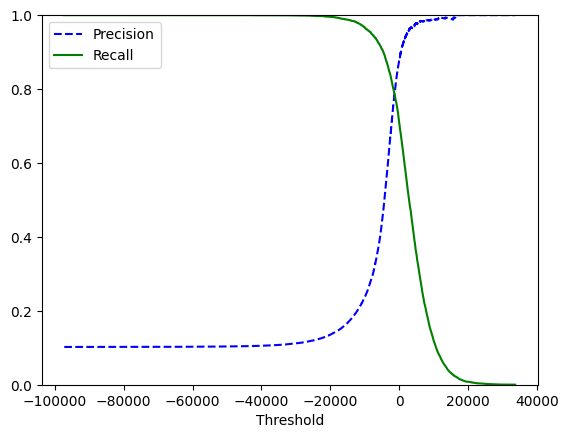

In [21]:
#Precision and recall for all threshold
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)

#Plotting
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 plt.xlabel("Threshold")
 plt.legend(loc="upper left")
 plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


We can select the best precision/recall tradeoff for the task

Another tool used with binary classifier is ROC(Receiver Operating Characteristics) curve. This plots the recall(true positive rate against false positive rate)

In [22]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_3, y_scores)

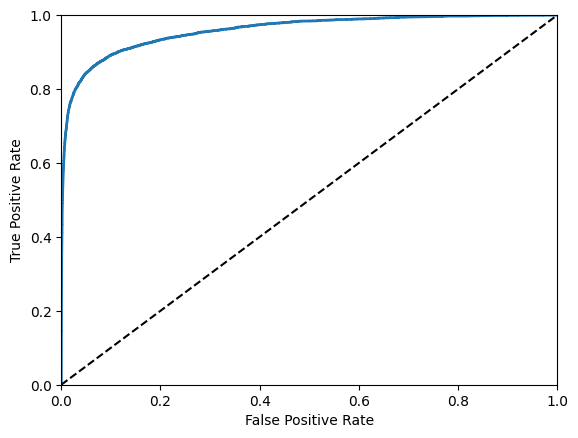

In [23]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--')
 plt.axis([0, 1, 0, 1])
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

One way to compare classifiers is to measure the area under the curve (AUC). A per‐
fect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will
have a ROC AUC equal to 0.5.

In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_3, y_scores)

0.9586806723799192

Training a RandomForestClassifier and comparing the ROC Curve and ROC AUC score

In [25]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_3, cv = 3, method = "predict_proba")

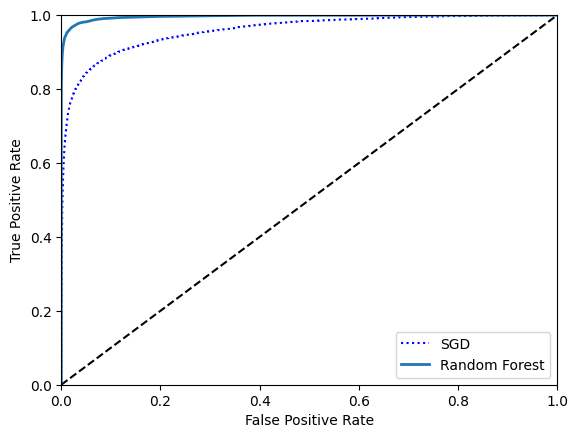

In [26]:
#We need scores, not probabilities
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_3, y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [27]:
roc_auc_score(y_train_3, y_scores_forest)

0.9964306764001045

Approx 98% precision and appox 82 % recall is not bad

Multiclass Classification

In [28]:
#Using SGD, which uses One-vs-All(OvA) that means training binary classifier for each digit, selecting the highest decision score from each classifier when classifying an image
#Another method is One-vs-One(OvO) which trains binary classifier for every pair of digit ie 0s and 1s..., N * (N - 1) / 2 classifiers, best score is selected
from sklearn.linear_model import SGDClassifier
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [29]:
#Lets confirm by checking all scores
some_digit_scores = sgd_clf.decision_function([some_digit])
print(some_digit_scores)
print(np.argmax(some_digit_scores))

[[-22795.7591506  -20634.14577517  -8506.38152587   5336.88860046
  -16304.98435304  -6729.6854358  -22228.5114801   -7919.28230892
   -2728.18841793  -4453.37325885]]
3


Scikit Learn uses OvA except SVM classifiers which use OvO (as it scales poorly with size of training set)

In [30]:
#OvO classifier
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array(['3'], dtype=object)

In [31]:
len(ovo_clf.estimators_) # 10 * 9 / 2

45

In [32]:
#We can use RandomForestClassifier instead of SGD as well
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])
#Here OvA or OvO is not used as RFC can directly classify instances into multiple classes

array(['3'], dtype=object)

In [33]:
#Checking the probabilities
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.97, 0.  , 0.01, 0.  , 0.  , 0.  , 0.01]])

The classifier is much confident on the digit being 3 as P(3) = 0.99 that is 99% probability

In [34]:
#Evaluating the classifiers
#First evaluating the accuracy of SGD classifier using cross_val_score()
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.8825 , 0.8379 , 0.87275])

It gives over 86% on all test folds

In [36]:
#we can scale the inputs to increase accuracy
from sklearn.preprocessing import StandardScaler
scale = StandardScaler();
X_train_scaled = scale.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

array([0.9006 , 0.89805, 0.90525])

As we can see the accuracy is improved

In [37]:
#We can use RandomSearchCV to fine tune the hyperparamaters of SGD classifer
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'loss': ['hinge', 'log_loss', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': uniform(loc = 0.0001, scale = 0.0999),
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': uniform(loc = 0.001, scale = 0.1)
}

random_search = RandomizedSearchCV(
    sgd_clf,
    param_distributions = param_dist,
    n_iter = 3,
    cv = 3,
    scoring = "accuracy",
    random_state = 42
)

random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, estimator=SGDClassifier(random_state=42), n_iter=3,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c9c45b42a10>,
                                        'eta0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c9c463bed50>,
                                        'learning_rate': ['constant', 'optimal',
                                                          'invscaling',
                                                          'adaptive'],
                                        'loss': ['hinge', 'log_loss',
                                                 'perceptron'],
                                        'penalty': ['l2', 'l1', 'elasticnet']},
                   random_state=42, scoring='accuracy')

In [38]:
print(random_search.best_params_)
print(random_search.best_estimator_)

{'alpha': 0.03751655787285152, 'eta0': 0.09607143064099162, 'learning_rate': 'invscaling', 'loss': 'hinge', 'penalty': 'l2'}
SGDClassifier(alpha=0.03751655787285152, eta0=0.09607143064099162,
              learning_rate='invscaling', random_state=42)


In [39]:
from sklearn.metrics import accuracy_score

best_sgd_clf = random_search.best_estimator_
y_pred = best_sgd_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy}")

Accuracy on test set: 0.7551


Error Analysis

In [40]:
#Analyzing the types of errors
#First looking at confusion matrix
y_train_pred = cross_val_predict(best_sgd_clf, X_train_scaled, y_train, cv =  3)
conf_matrix = confusion_matrix(y_train, y_train_pred)
conf_matrix

array([[5762,    2,   14,    9,   18,   21,   43,    7,   44,    3],
       [   2, 6545,   39,   19,    8,   32,   10,   18,   61,    8],
       [  65,   73, 5275,   69,   97,   19,   83,  114,  142,   21],
       [  34,   50,  175, 5338,   15,  209,   34,   89,  119,   68],
       [  13,   41,   35,    8, 5399,   11,   47,   15,   50,  223],
       [  90,   51,   31,  178,   82, 4641,  129,   40,  129,   50],
       [  46,   27,   47,    4,   35,   80, 5628,    6,   42,    3],
       [  24,   68,   63,   24,   83,   12,    6, 5772,   14,  199],
       [  60,  218,   82,  149,   61,  204,   60,   32, 4877,  108],
       [  48,   33,   23,  110,  253,   46,    4,  226,   46, 5160]])

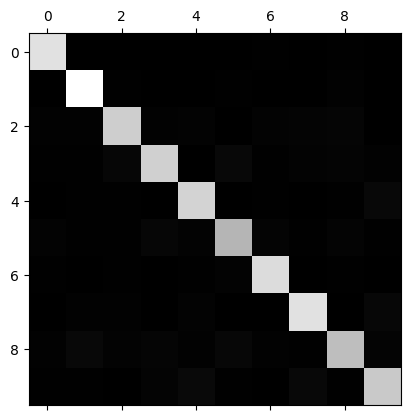

In [41]:
#There are Lots of numbers, lets plot using matshow()
plt.matshow(conf_matrix, cmap = plt.cm.gray)
plt.show()

In [42]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = conf_matrix / row_sums

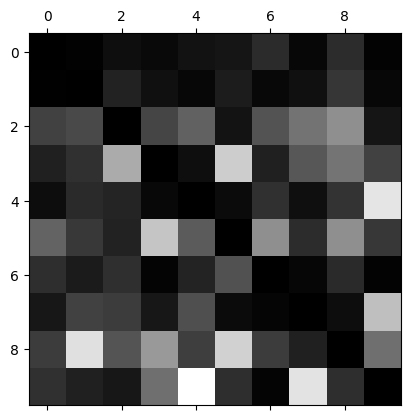

In [43]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()



## Conclusion
In this project, we successfully implemented a handwritten digit classifier using the MNIST dataset. 
The dataset was preprocessed, and a model was trained to recognize digits with high accuracy.

### Key Takeaways:
- The MNIST dataset is well-structured for digit classification tasks.
- Machine learning models can achieve high accuracy with appropriate training and hyperparameter tuning.
- Further improvements can be made by experimenting with deeper neural networks or using convolutional layers for better feature extraction.

### Future Work:
- Implementing a Convolutional Neural Network (CNN) for improved accuracy.
- Exploring data augmentation techniques to enhance model robustness.
- Deploying the model as a web application for real-world use.
